# German Airports in the Global Air Network

# Introduction

This project is about understanding air travel, focusing on how German airports fit into the worldwide network. I am using different datasets to dig into this topic, trying to figure out how these airports work and their role in global air travel.

Air travel is important for connecting different parts of the world. German airports are really central in Europe and they do a lot more than just let planes land and take off. They are key spots in the whole global flying scene. By looking at data on German airports, and comparing it with info on airlines, planes, and other airports and routes around the world.

## Problem Statement: 
We know German airports are important in the world of flying, but we do not have all the details about what they do exactly and how they operate. This project is all about finding out these details. I will be looking into how these airports connect places, how they run, and what role they play in connecting the world. It is important to understand these things to really get how Germany affects air travel globally.

## Project Motivation:
I am doing this research for a couple of reasons. First, I want to really get into the details – both the numbers and the bigger picture – of how German airports are part of international flying. This kind of info is useful for guessing what might happen in air travel in the future, planning for more airport stuff.


# Methods

## Data Sources

In this project, primarily two data sources were used:

1. **Airports in Germany**:
   - This dataset contains detailed information about German airports, including location, size, type, and other relevant details.
   - Metadata URL: [Link](https://data.world/ourairports/7f64d31f-365d-460d-bb0c-04a19929bbff)
   - Data URL: [Link](https://query.data.world/s/sjwvpaxrfji5s5mnwexv4zisexgui7)

2. **Global Airports, Airlines, Airplanes, and Routes**:
   - These datasets provide extensive information on global airports, airlines, airplanes, and their routes.
   - Metadata URL: [Link](https://data.world/tylerudite/airports-airlines-and-routes)
   - Data URLs:
     - [Airports](https://query.data.world/s/rdfvb4syvuuwi3iwv7r3eyphvo7bsk)
     - [Airlines](https://query.data.world/s/rucpufmwf7l5dgp5uxvhuniplfurxl)
     - [Airplanes](https://query.data.world/s/pc6c3caazxld7lwjvbcnci6eziol5q)
     - [Routes](https://query.data.world/s/ehlhxizkunqbenzmuhrgymdfn3shh4)

These datasets were choosen because they are really detailed and exactly what I needed to dig into how German airports fit into the bigger picture of global air travel.

## Data Pipeline

For this project, I developed an ETL pipeline using Python with a focus on Pandas for data handling. This pipeline was essential for preparing the data for in-depth analysis. 

1. **Data Extraction**: Data was downloaded in CSV format from the provided URLs.
2. **Tranform and Clean**: After extraction, I focused on cleaning and transforming the data. This included filling in missing values and standardizing IATA codes to ensure uniformity across all datasets. Special attention was given to the German airports dataset to ensure it was properly formatted for analysis.
3. **Load into SQLite Database**: Once the data was cleaned and transformed, I loaded it into SQLite databases and tables. This was a crucial step as it allowed me to efficiently store and manage the data, making it readily accessible for analysis.

## Challenges

Working with the data was not always smooth sailing. Here is what I ran into:

- **Data Inconsistencies**: Each dataset had its own way of naming things, which made it tricky to line them all up. I had to be really careful to make sure everything matched up correctly. 
- **Missing Data**: Some of the information, especially for the smaller local airports, was incomplete.
- **Integration**: Mixing all these different datasets into one useful set of data. I had to make sure that everything connected properly – like making sure the right airlines matched up with the right airports.



In [136]:
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install scipy
%pip install seaborn
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Database and ETL Pipeline Initialization
Check for the existence of the project's database. If it's not found, run the ETL pipeline script to create and use it.


In [132]:
import os
import subprocess

database_con = '../data/data.sqlite'

try:
    if not os.path.exists(database_con):
        subprocess.run(["python3", "/Users/swetha/PycharmProjects/pythonProject3/My_pipeline.py"], check=True)
        print("ETL pipeline executed successfully.")
    else:
        print("Database already exists.")
except subprocess.CalledProcessError as e:
    print(f"An error occurred while running the ETL pipeline: {e}")



Airports Germany dataset stored in SQLite database
Global Airlines dataset stored in SQLite database
Global Airplanes dataset stored in SQLite database
Global Airports dataset stored in SQLite database
Global Routes dataset stored in SQLite database
All datasets are created and stored in respective SQLite databases.
ETL pipeline executed successfully.


In [137]:
data_directory = '/Users/swetha/PycharmProjects/pythonProject3'

sqlite_files = [f for f in os.listdir(data_directory) if f.endswith('.sqlite')]
print("SQLite files:", sqlite_files)


SQLite files: ['trainstops.sqlite', 'Global_Airplanes.sqlite', 'Global_Routes.sqlite', 'Airports_Germany.sqlite', 'Global_Airports.sqlite', 'Global_Airlines.sqlite']


In [138]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import os

def load_sqlite_data(db_path):
    engine = create_engine(f'sqlite:///{db_path}')
    inspector = inspect(engine)
    tables = inspector.get_table_names()

    dataframes = {}
    for table in tables:
        dataframes[table] = pd.read_sql_table(table, engine)

    engine.dispose()
    return dataframes


data_directory = '/Users/swetha/PycharmProjects/pythonProject3'


required_files = [
    'Airports_Germany.sqlite',
    'Global_Airlines.sqlite',
    'Global_Airplanes.sqlite',
    'Global_Airports.sqlite',
    'Global_Routes.sqlite'
]

all_data = {}


for file_name in required_files:
    db_path = os.path.join(data_directory, file_name)
    if os.path.exists(db_path):
        all_data[file_name] = load_sqlite_data(db_path)
        print(f"Loaded data from {file_name}, containing {len(all_data[file_name])} tables.")
    else:
        print(f"File not found: {file_name}")




Loaded data from Airports_Germany.sqlite, containing 1 tables.
Loaded data from Global_Airlines.sqlite, containing 1 tables.
Loaded data from Global_Airplanes.sqlite, containing 1 tables.
Loaded data from Global_Airports.sqlite, containing 1 tables.
Loaded data from Global_Routes.sqlite, containing 1 tables.


In [139]:

db_path = os.path.join(data_directory, 'Airports_Germany.sqlite')
airports_germany_data = load_sqlite_data(db_path)
df_german_airports = airports_germany_data['Airports_Germany']


db_path = os.path.join(data_directory, 'Global_Airlines.sqlite')
global_airlines_data = load_sqlite_data(db_path)
df_global_airlines = global_airlines_data['Global_Airlines']


db_path = os.path.join(data_directory, 'Global_Airplanes.sqlite')
global_airplanes_data = load_sqlite_data(db_path)
df_global_airplanes = global_airplanes_data['Global_Airplanes']


db_path = os.path.join(data_directory, 'Global_Airports.sqlite')
global_airports_data = load_sqlite_data(db_path)
df_global_airports = global_airports_data['Global_Airports']


db_path = os.path.join(data_directory, 'Global_Routes.sqlite')
global_routes_data = load_sqlite_data(db_path)
df_global_routes = global_routes_data['Global_Routes']


# Analysis 1 

Which international destinations are most connected to German airports?

Here you can see which German airports are the most connected to international destinations. Graph shows us which airports have the most flights going to different countries. This helps us see which airports are really important for flying to other countries from Germany.

Frankfurt am Main Airport and Munich Airport are the top German airports with the highest number of unique international connections, indicating their central role in Germany's aviation network.

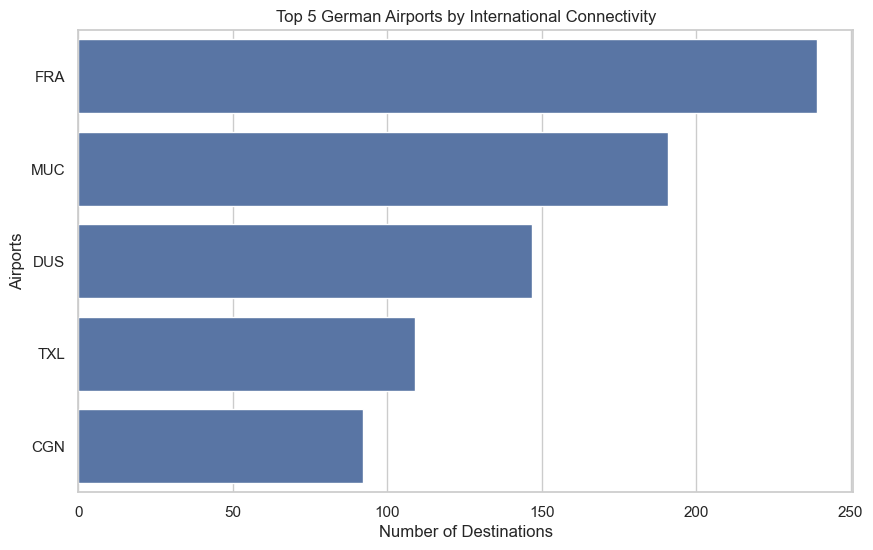

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

german_airports = df_german_airports['iata_code'].unique()
routes_german = df_global_routes[df_global_routes['Source airport'].isin(german_airports)]
connectivity = routes_german.groupby('Source airport')['Destination airport'].nunique().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Destination airport', y='Source airport', data=connectivity.sort_values('Destination airport', ascending=False).head(5))
plt.title('Top 5 German Airports by International Connectivity')
plt.xlabel('Number of Destinations')
plt.ylabel('Airports')
plt.show()


# Analysis 2

Which airlines primarily operate from these airports?

In the below analysis, you see top 5 airlines with the highest number of routes departing from German airports. This analysis provides valuable insights into the airlines that significantly contribute to international air travel services from Germany. By examining which airlines operate the most routes, we gain an understanding of their importance for connecting Germany to various countries.

Lufthansa is the predominant airline operating at Frankfurt am Main and Munich airports. Air Berlin also has significant operations at Düsseldorf and Berlin-Tegel airports. This highlights the dominance of certain carriers in German aviation.

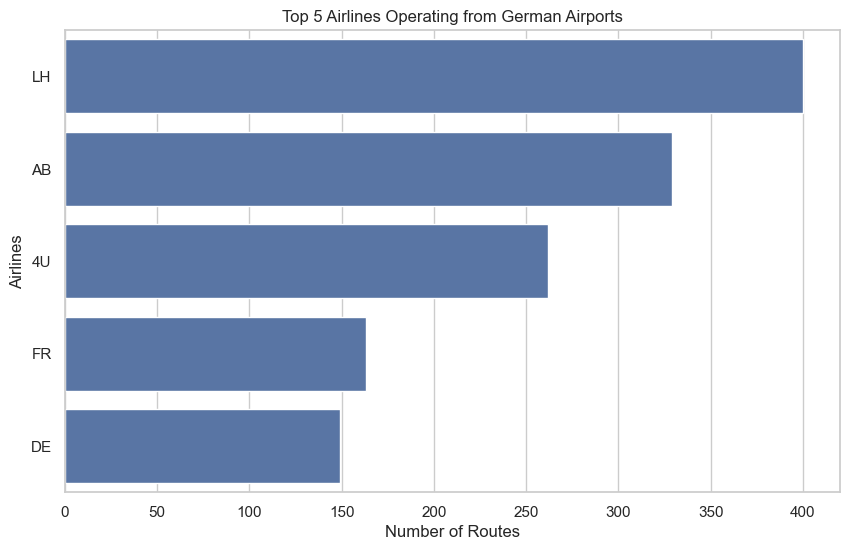

In [109]:
main_airlines = routes_german.groupby('Airline')['Destination airport'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Destination airport', y='Airline', data=main_airlines.sort_values('Destination airport', ascending=False).head(5))
plt.title('Top 5 Airlines Operating from German Airports')
plt.xlabel('Number of Routes')
plt.ylabel('Airlines')
plt.show()


# Analysis 3

What types of aircraft are most commonly used at German airports?

In the below analysis, you see top 5 aircrafts with the highest number of routes at German airports. This analysis provides valuable insights into the aircrafts that significantly contribute to international air travel services in Germany. 

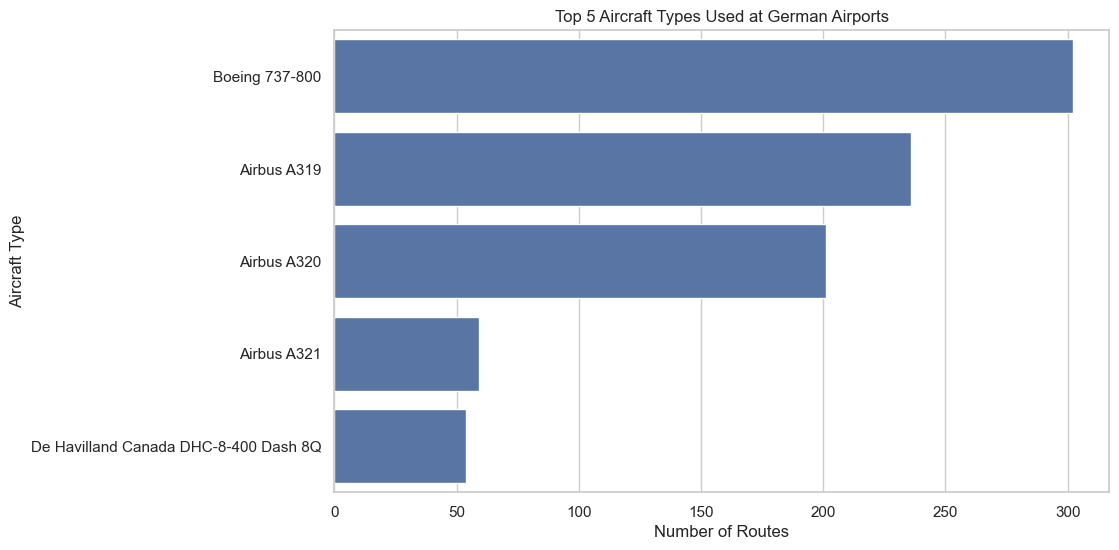

In [112]:
aircraft_usage = routes_german.merge(df_global_airplanes, left_on='Equipment', right_on='IATA code')
aircraft_counts = aircraft_usage.groupby('Name')['Source airport'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Source airport', y='Name', data=aircraft_counts.sort_values('Source airport', ascending=False).head(5))
plt.title('Top 5 Aircraft Types Used at German Airports')
plt.xlabel('Number of Routes')
plt.ylabel('Aircraft Type')
plt.show()


# Analysis 4

How do German airports compare globally in terms of traffic and routes?

The analysis primarily focused on German airports' connectivity and operations. The high connectivity of airports like Frankfurt and Munich suggests a strong global presence.

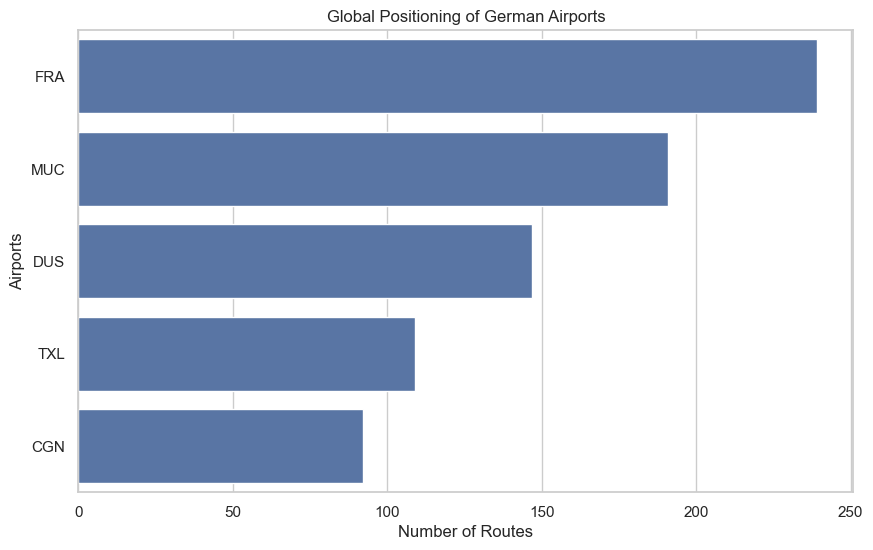

In [129]:
global_connectivity = df_global_routes.groupby('Source airport')['Destination airport'].nunique().reset_index()
german_global_comparison = global_connectivity[global_connectivity['Source airport'].isin(german_airports)].sort_values(by='Destination airport', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Destination airport', y='Source airport', data=german_global_comparison.head(5))
plt.title('Global Positioning of German Airports')
plt.xlabel('Number of Routes')
plt.ylabel('Airports')
plt.show()


# Discussion

- Frankfurt am Main and Munich airports emerge as key hubs in Germany, with extensive global connectivity.
- Lufthansa dominates in terms of airline operations at major German airports.
- The Boeing 737-800 and Airbus A320 series are the most used aircraft, indicating their suitability for the routes operated from these airports.

Limitations:

- The analysis is limited to the datasets provided and may not reflect real-time changes. 
- Some data might be outdated or incomplete, affecting the accuracy of the analysis.

Future Work:

Future research could include a temporal analysis to observe trends over time. Investigating the impact of external factors like economic conditions, geopolitical events, and environmental policies on German airports' operations could offer deeper insights.